# `python` package for the Mars Climate Database: how to use?

*NB: to learn how to directly wrap within `python` the Fortran routine `call_mcd` compiled with `f2py`, look at the folder `test_mcd`*

### General steps to follow to use the `mcd` class

**Step 1** import `mcd` class from `mcd` package

In [1]:
from mcd import mcd

In [2]:
# This line configures matplotlib to show figures embedded in the notebook.
%matplotlib inline

**Step 2** create your request

In [3]:
req = mcd()

**Step 3** set the coordinates for your request (for instance, let us choose Curiosity landing site)

In [4]:
req.lat = -4.6 # latitude
req.lon = 137.4 # longitude
req.loct = 15. # local time
req.xz = 1. # vertical coordinate
req.xdate = 150.6 # areocentric longitude

**Step 4** retrieve fields from the Mars Climate Database (all fields are stored in the `req` object)

In [5]:
req.update()

**Step 5** print requested results

* Requested coordinates (for a reminder)

In [6]:
req.printcoord()

LAT -4.6 LON 137.4 LOCT 15.0 XDATE 150.6


* Main atmospheric variables

In [7]:
req.printmeanvar()

Pressure = 699.993 pascals. 
Density = 0.015 kilograms per cubic meter. 
Temperature = 251 kelvins ( -23 degrees celsius).
Zonal wind = -1.869 meters per second.
Meridional wind = -1.727 meters per second.
Total horizontal wind = 2.545 meters per second.


* Shortcut: `req.printmcd()` is equivalent to the three previous commands in a row (`update`+`printcoord`+`printmeanvar`)

In [8]:
req.printmcd()

LAT -4.6 LON 137.4 LOCT 15.0 XDATE 150.6
-------------------------------------------
Pressure = 699.993 pascals. 
Density = 0.015 kilograms per cubic meter. 
Temperature = 251 kelvins ( -23 degrees celsius).
Zonal wind = -1.869 meters per second.
Meridional wind = -1.727 meters per second.
Total horizontal wind = 2.545 meters per second.


* The extvar number can also be used to inquire a specific variable (see Fortran sources).

In [9]:
req.printextvar(22)

surface pressure RMS day to day variations (Pa) ..... 1.1420156


* Another way to inquire for a specific variable is through a string.

In [10]:
req.printextvar("tsurf")

surface temperature (K) ..... 267.80548


* Print all field

In [11]:
req.printallextvar()

Radial distance from planet center (m) ..... 3391147.8
Altitude above areoid (Mars geoid) (m) ..... -4487.0483
Altitude above local surface (m) ..... 1.0
orographic height (m) (surf alt above areoid) ..... -4488.0483
Ls, solar longitude of Mars (deg) ..... 150.6
LST local true solar time (hrs) ..... 15.0
Universal solar time (LST at lon=0) (hrs) ..... 5.84
Air heat capacity Cp (J kg-1 K-1) ..... 805.7861
gamma=Cp/Cv Ratio of specific heats ..... 1.3101043
density RMS day to day variations (kg/m^3) ..... 4.6305267e-05
[not defined] ..... 0.0
[not defined] ..... 1.5362656
scale height H(p) (m) ..... 12598.541
GCM orography (m) ..... -1538.877
surface temperature (K) ..... 267.80548
daily max mean surface temperature (K) ..... 278.8753
daily min mean surface temperature (K) ..... 185.13141
surf. temperature RMS day to day variations (K) ..... 0.2915892
surface pressure (Pa) ..... 700.04816
GCM surface pressure (Pa) ..... 547.7387
atmospheric pressure RMS day to day variations (Pa) ..... 1

### 1D slices

Request 1D plot of diurnal cycle for one variable ...

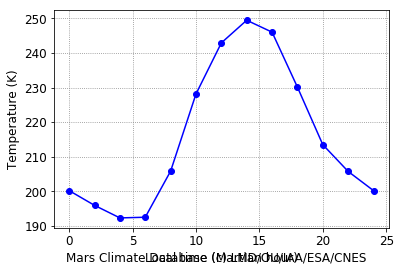

In [12]:
req.diurnal()
req.plot1d("t")

... and for several variables

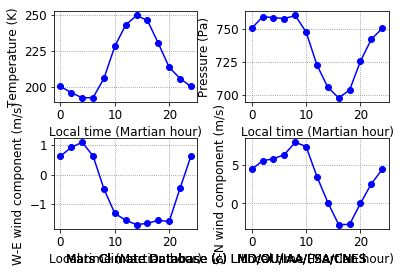

In [13]:
req.plot1d(["t","p","u","v"])

Request seasonal cycle (this takes a longer time)

~~~python
req.seasonal()
req.plot1d(["tsurf","u","v"])
~~~

1D slicing also works for vertical profiles. Start and end of profile can be set easily

--- as well as the kind of vertical coordinate through the `zkey` variable (as in MCD Fortran routines)

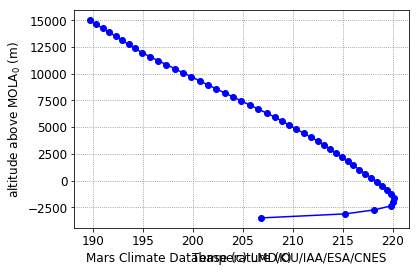

In [14]:
req.xzs = -3500.
req.xze = 15000.
req.zkey = 2
req.lat = 25.
req.lon = 195.
req.loct = 4.2
req.xdate = 140.
req.profile(nd=50)
req.plot1d("t")

It is a good place here to remind you that any field stored in the Mars Climate Database is inside the `req` object.

This allows you to work out further calculations, e.g. to combine several variables to obtain new diagnostics.

Here is for instance a calculation for potential temperature

In [15]:
tpot = req.temptab*((610./req.prestab)**(1.0/3.9))
print tpot

[201.1572583  211.22523237 215.9686743  219.52388953 221.56099043
 223.61689776 225.27546197 226.74706424 228.22724577 229.69205915
 231.07279263 232.46012737 233.85404205 235.25454747 236.69466041
 238.15057247 239.61367649 241.08402064 242.56161892 244.00100284
 245.36319021 246.73011101 248.10175883 249.47808724 250.85906992
 252.24469483 253.55965513 254.86686625 256.17658452 257.4887532
 258.80329225 260.1201536  261.43924427 262.80150595 264.21617887
 265.63395232 267.05474326 268.47848537 269.90508364 271.3345215
 272.76667082 274.25829589 276.02801885 277.80602323 279.5923138
 281.38687676 283.18971348 285.00077914 286.82011179 288.64766982]


### 1D slices: ASCII outputs

It is easy to get ASCII files containing 1D slices. Say, for instance, diurnal cycle of temperature.

In [16]:
req = mcd()
req.diurnal()
req.getascii("t",filename="diurnal.txt")
%cat diurnal.txt ; rm -rf diurnal.txt

##########################################################################################
### MCD_v5.3 with climatology average solar scenario.
### Ls 0.0deg. Latitude 0.0N Longitude 0.0E Altitude 10.0 m ALS Local time 0.0h
### --------------------------------------------------------------------------------------
### Column 1 is Local time (Martian hour)
### Column 2 is Temperature (K)
### --------------------------------------------------------------------------------------
### Retrieved on: 2021-09-01T14:23:09.897829
### Mars Climate Database (c) LMD/OU/IAA/ESA/CNES
##########################################################################################
    0.00000e+00    2.05811e+02
    2.00000e+00    2.00794e+02
    4.00000e+00    1.96534e+02
    6.00000e+00    1.92683e+02
    8.00000e+00    2.06039e+02
    1.00000e+01    2.24079e+02
    1.20000e+01    2.36748e+02
    1.40000e+01    2.45291e+02
    1.60000e+01    2.48755e+02
    1.80000e+01    2.34069e+02
    2.00000e+01    2.19

### 2D mapping

Simple 2D longitude-latitude map with default cylindrical view. Map projections can be used, provided `basemap` is installed -- for instance, for Robinson projection add `proj="robin"` to the `map2d` call below.

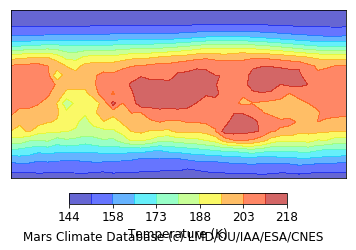

In [17]:
test = mcd()
test.loct = 15.
test.xz = 10000.
test.map2d("t")

You can also use the method `htmlmap2d` that will create a PNG file with your figure in it. This is the function actually used in the online MCD interface.

In [18]:
test.htmlmap2d("t")

/home/aspiga/soft/conda/miniconda2/envs/py2/lib/python2.7/site-packages/scipy/io/netcdf.py:317: RuntimeWarning: Cannot close a netcdf_file opened with mmap=True, when netcdf_variables or arrays referring to its data still exist. All data arrays obtained from such files refer directly to data on disk, and must be copied before the file can be cleanly closed. (See netcdf_file docstring for more information on mmap.)
  ), category=RuntimeWarning)


Adding wind vectors can be done with the `incwind` argument.

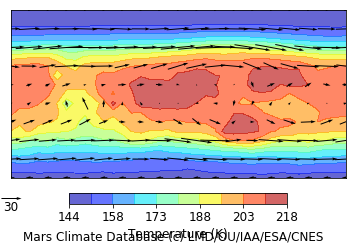

In [19]:
test.map2d("t",incwind=True)

NB: `map2d` works with several variables

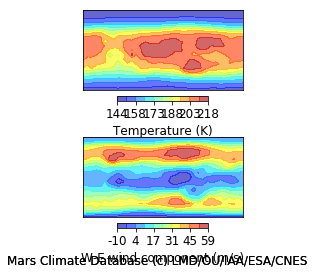

In [20]:
test.map2d(["t","u"])

### NB: to save figures

~~~python
import matplotlib.pyplot as mpl
mpl.savefig("temp.png",dpi=85,bbox_inches='tight',pad_inches=0.25)
~~~

To obtain a name corresponding to the request

In [21]:
figname = test.getnameset()+'.png'
print figname

310000.0NoneNone0.0NoneNone0.0NoneNone110.0NoneNone15.0NoneNone1.png


### advanced diagnostics

Hövmoller plot

In [22]:
test = mcd()
test.xz = 50000.
test.lat = 20.

test.locts = 0.
test.locte = 24.

test.lons = -180.
test.lone = +180.

test.htmlplot2d("tsurf",figname="hov.png")

Zonal average : lat/altitude figure

In [23]:
test = mcd()
test.zonmean = True
test.lats = -90.
test.late = 90.
test.htmlplot2d("u",figname="zonm.png")

Zonal average : ls/lat figure

In [24]:
test = mcd()
test.zonmean = True
test.lats = -90.
test.late = 90.
test.xdates = 0.
test.xdatee = 360.
test.htmlplot2d("h2ovap",figname="zonmm.png")

see difference with following case

In [25]:
test.zonmean = False
test.lon = 0.
test.htmlplot2d("h2ovap",figname="hovls.png")